### *Importing necessary libraries*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from joblib import parallel_backend
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

### *Reading the data file*

In [ ]:
df_1airport = pd.read_pickle("C:\Kaggle\OneAirportModel/Train_Test_Data_Airport_Flight_Delays.pkl")

In [ ]:
df_1airport  # printing the dataframe

,index,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME_INT,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,DEP_DEL15
0,843141,2,7,2,4,15,14,4769,819756,13382999,...,0.000099,15,41.785,-87.752,0.02,0.0,0.0,50.0,24.38,1
1,5398935,10,6,4,2,8,14,6890,819756,13382999,...,0.000099,19,41.785,-87.752,2.18,0.0,0.0,48.0,12.53,0
2,4661064,9,3,4,1,13,14,6386,819756,13382999,...,0.000099,4,41.785,-87.752,0.00,0.0,0.0,69.0,8.95,0
3,2018389,4,6,7,2,16,14,6362,819756,13382999,...,0.000099,2,41.785,-87.752,0.00,0.0,0.0,66.0,4.92,1
4,916026,2,7,3,3,12,14,4769,819756,13382999,...,0.000099,12,41.785,-87.752,0.20,3.1,0.0,27.0,11.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56347,2018435,4,6,3,4,14,14,6362,819756,13382999,...,0.000099,15,41.785,-87.752,0.00,0.0,0.0,66.0,4.92,0
56348,4835097,9,4,2,1,16,14,6386,819756,13382999,...,0.000099,5,41.785,-87.752,0.00,0.0,0.0,74.0,4.92,0
56349,822265,2,2,2,2,18,14,4769,819756,13382999,...,0.000099,9,41.785,-87.752,0.00,0.0,3.1,35.0,4.70,0
56350,4617665,9,7,3,2,11,14,6386,819756,13382999,...,0.000099,15,41.785,-87.752,0.34,0.0,0.0,73.0,4.47,0


### *Data characterstics*

In [ ]:
df_1airport.dtypes

index                              int64
MONTH                              int64
DAY_OF_WEEK                        int64
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
CARRIER_NAME_INT                   int32
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
LATITUDE                         float64
LONGITUDE                        float64
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                             float64
AWND                             float64
DEP_DEL15                          int64
dtype: object

In [ ]:
df_1airport.describe()

,index,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME_INT,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,DEP_DEL15
count,5.635200e+04,56352.000000,56352.000000,56352.000000,56352.000000,56352.000000,56352.000000,56352.000000,56352.0,5.635200e+04,...,56352.000000,56352.000000,5.635200e+04,5.635200e+04,56352.000000,56352.000000,56352.000000,56352.000000,56352.000000,56352.000000
mean,3.457041e+06,6.676515,3.923978,3.672363,3.495599,14.367476,13.741571,5935.618079,819756.0,1.298396e+07,...,0.000100,11.703205,4.178500e+01,-8.775200e+01,0.132479,0.090089,0.297892,59.434927,9.505875,0.265368
std,1.846643e+06,3.347231,1.988478,1.898518,1.794568,4.731697,1.317938,1607.925992,0.0,1.889771e+06,...,0.000008,5.909450,1.628578e-11,8.171314e-12,0.312799,0.476124,1.194628,20.890108,3.379749,0.441533
min,3.632800e+04,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,819756.0,1.212846e+06,...,0.000094,0.000000,4.178500e+01,-8.775200e+01,0.000000,0.000000,0.000000,-10.000000,2.910000,0.000000
25%,1.997925e+06,4.000000,2.000000,2.000000,2.000000,11.000000,14.000000,6044.000000,819756.0,1.338300e+07,...,0.000099,7.000000,4.178500e+01,-8.775200e+01,0.000000,0.000000,0.000000,43.000000,7.160000,0.000000
50%,3.617592e+06,7.000000,4.000000,3.000000,3.000000,14.000000,14.000000,6386.000000,819756.0,1.338300e+07,...,0.000099,13.000000,4.178500e+01,-8.775200e+01,0.000000,0.000000,0.000000,61.000000,9.170000,0.000000
75%,5.217582e+06,10.000000,6.000000,4.000000,5.000000,18.000000,14.000000,6839.000000,819756.0,1.338300e+07,...,0.000099,16.000000,4.178500e+01,-8.775200e+01,0.090000,0.000000,0.000000,78.000000,11.630000,1.000000
max,6.487599e+06,12.000000,7.000000,9.000000,9.000000,27.000000,14.000000,6890.000000,819756.0,1.338300e+07,...,0.000149,22.000000,4.178500e+01,-8.775200e+01,2.280000,5.400000,9.800000,95.000000,25.950000,1.000000


### *Creating X (independent) and Y (dependent) variables out of data*

In [ ]:
X = df_1airport[['MONTH',
'DAY_OF_WEEK',
'DISTANCE_GROUP',
'SEGMENT_NUMBER',
'CONCURRENT_FLIGHTS',
'CARRIER_NAME_INT',
'AIRLINE_AIRPORT_FLIGHTS_MONTH',
'AVG_MONTHLY_PASS_AIRPORT',
'AVG_MONTHLY_PASS_AIRLINE',
'FLT_ATTENDANTS_PER_PASS',
'GROUND_SERV_PER_PASS',
'PLANE_AGE',
'PRCP',
'SNOW',
'SNWD',
'TMAX',
'AWND']]

In [ ]:
y = df_1airport['DEP_DEL15']

### *Splitting the dataset into train and validation data*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

## *Calculating feature importances*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 100, # number of trees
    max_depth= 5,       # parameters for the individual trees
    oob_score = True,   # whether or not to compute OOB score
    random_state = 22,   # random state for reproducibility
    class_weight = 'balanced' 
)

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, oob_score=True,
                       random_state=22)

In [ ]:
rf.feature_importances_

array([0.11936549, 0.00813166, 0.00712616, 0.38405617, 0.01464141,
       0.03130632, 0.07086877, 0.        , 0.02218555, 0.01088487,
       0.02401808, 0.00614902, 0.11458085, 0.08219807, 0.01987587,
       0.03872734, 0.04588436])

In [ ]:
pd.Series(rf.feature_importances_, index = rf.feature_names_in_).sort_values(ascending = False)

SEGMENT_NUMBER                   0.384056
MONTH                            0.119365
PRCP                             0.114581
SNOW                             0.082198
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.070869
AWND                             0.045884
TMAX                             0.038727
CARRIER_NAME_INT                 0.031306
GROUND_SERV_PER_PASS             0.024018
AVG_MONTHLY_PASS_AIRLINE         0.022186
SNWD                             0.019876
CONCURRENT_FLIGHTS               0.014641
FLT_ATTENDANTS_PER_PASS          0.010885
DAY_OF_WEEK                      0.008132
DISTANCE_GROUP                   0.007126
PLANE_AGE                        0.006149
AVG_MONTHLY_PASS_AIRPORT         0.000000
dtype: float64

## *Baseline Random forest analysis*

In [ ]:
y_pred = rf.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_val, y_pred)

0.6333845971844315

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.38      0.62      0.47      4487
       False       0.82      0.64      0.72     12419

    accuracy                           0.63     16906
   macro avg       0.60      0.63      0.60     16906
weighted avg       0.70      0.63      0.65     16906



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve

labels = [True, False]
cm = confusion_matrix(y_val, y_pred,labels=[1,0])
cm

#                     |  Predicted Delayed   Predicted NotDelayed  - 
#==============================================================
# Actual Delayed      |   TP                     FN
# Actual Not Delayed  |   FP                     TN  

array([[2763, 1724],
       [4474, 7945]])

In [ ]:
precision_score(y_val, y_pred, pos_label = 0)

0.821698210776709

In [ ]:
precision_score(y_val, y_pred, pos_label = 1)

0.38178803371562803

In [ ]:
pip install imblearn


     -------------------------------------- 199.3/199.3 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### *Model training and applying SMOTE to counter imabalance*

In [ ]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', RandomForestClassifier(
                                                                    class_weight = 'balanced' 
                                                                )]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

param_grid = {
    'classifier__max_features': [10,11,15,17],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__min_samples_split': [1,2,3],
    "classifier__n_estimators":[5,10,50,100,250],
    "classifier__max_depth":[32,64,80,100]    
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1,verbose=10)


with parallel_backend('multiprocessing'):
    grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sharm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sharm\anaconda3\lib\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\sharm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\sharm\anaconda

### *Evaluating on Validation set*

In [ ]:
X_val

,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME_INT,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND
2147,7,3,8,1,18,14,6862,819756,13382999,0.000062,0.000099,21,0.00,0.0,0.0,76.0,8.95
18287,7,2,7,1,18,14,6862,819756,13382999,0.000062,0.000099,3,0.05,0.0,0.0,82.0,6.49
54586,12,6,4,2,6,14,6266,819756,13382999,0.000062,0.000099,5,0.00,0.0,0.0,47.0,7.61
48120,10,1,2,4,13,14,6890,819756,13382999,0.000062,0.000099,12,0.00,0.0,0.0,69.0,7.38
37304,10,2,5,5,13,14,6890,819756,13382999,0.000062,0.000099,20,0.15,0.0,0.0,45.0,8.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29116,5,6,7,1,11,14,6600,819756,13382999,0.000062,0.000099,1,0.00,0.0,0.0,81.0,11.63
22101,6,5,3,8,20,14,6607,819756,13382999,0.000062,0.000099,18,0.00,0.0,0.0,72.0,7.16
32129,5,5,1,5,20,14,6600,819756,13382999,0.000062,0.000099,12,0.06,0.0,0.0,68.0,12.30
52483,7,5,5,5,21,14,6862,819756,13382999,0.000062,0.000099,5,0.00,0.0,0.0,85.0,9.40


In [ ]:
y_pval = loaded_model.predict(X_val)
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_val, y_pval)

0.7024724949721992

In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_pval, y_val, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.46      0.44      0.45      4648
       False       0.79      0.80      0.80     12258

    accuracy                           0.70     16906
   macro avg       0.62      0.62      0.62     16906
weighted avg       0.70      0.70      0.70     16906



[[0.10676683 0.15858275]
 [0.14273039 0.59192003]]


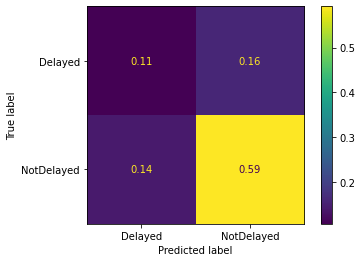

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_val,y_pval ,labels=[1,0],normalize='all')
print(cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Delayed','NotDelayed'])
cmd.plot()



In [ ]:
probas = grid_search.predict_proba(X_val)

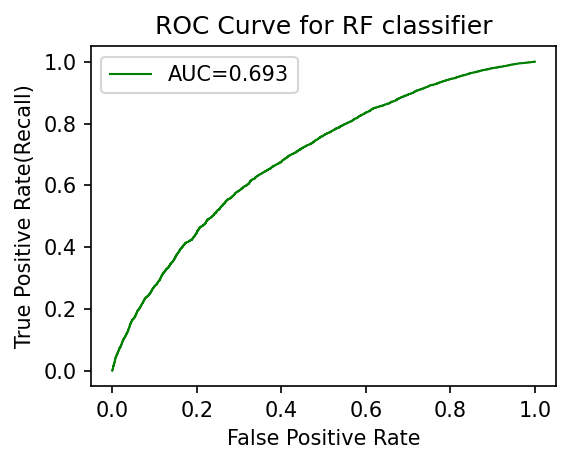

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds  = roc_curve(y_val,probas[:,0],pos_label=0)
roc_auc = auc(fpr,tpr)

plt.figure(dpi=150,figsize=(4,3))
plt.plot(fpr,tpr,lw=1,color='green',label=f'AUC={roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

## *Evaluating on the unseen test set*

In [ ]:
import pandas as pd
df_test = pd.read_pickle("C:\Kaggle\OneAirportModel/Validation_Data_Airport_Flight_Delays.pkl") # Named is misnomer (it should be test set) 

In [ ]:
y_test = df_test['DEP_DEL15']

In [ ]:
X_test = df_test[['MONTH',
'DAY_OF_WEEK',
'DISTANCE_GROUP',
'SEGMENT_NUMBER',
'CONCURRENT_FLIGHTS',
'CARRIER_NAME_INT',
'AIRLINE_AIRPORT_FLIGHTS_MONTH',
'AVG_MONTHLY_PASS_AIRPORT',
'AVG_MONTHLY_PASS_AIRLINE',
'FLT_ATTENDANTS_PER_PASS',
'GROUND_SERV_PER_PASS',
'PLANE_AGE',
'PRCP',
'SNOW',
'SNWD',
'TMAX',
'AWND']]

In [ ]:
y_ptest = loaded_model.predict(X_test)
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_ptest)

0.7049811602004058

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_ptest, y_test, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.46      0.45      0.45      6652
       False       0.79      0.80      0.80     17499

    accuracy                           0.70     24151
   macro avg       0.63      0.62      0.63     24151
weighted avg       0.70      0.70      0.70     24151



In [ ]:
y_ptest = loaded_model.predict(X_test)

[[0.12289346 0.14247857]
 [0.15254027 0.5820877 ]]


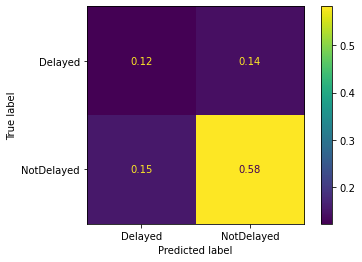

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test, y_ptest, labels = [True, False], normalize = 'all')
print(cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Delayed','NotDelayed'])
cmd.plot()

### *Saving the model*

In [ ]:
import pickle
filename='rfmodel.sav'
pickle.dump(grid_search,open(filename,'wb'))

In [ ]:
import pickle
filename='rfmodel.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
### End of code